# The I-94 Traffic Dataset

We are gpomg to analyze a dataset about the westbound traffic on the I-94 Interstate highway in the United States. The dataset is available here [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

The goal for this analysis is to come up with a few indicators of heavy traffic on I-94.

* Read in the ```Metro_Interstate_Traffic_Volume.csv``` file using Pandas.
* Examine the first and the last five rows.
* Use ```DataFrame.info()``` to find more information about the dataset.

In [1]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Analyzing Traffic Volume

The dataset documentation mentions a station located about midway between Minneapolis and Saint Paul that only records westbound traffice (i.e. going from east to west). This means that the results of our analysis will be about westbound trafic near that station, so we should avoid generalizing our results for the entire I-94 highway.

We will plot a histogram to show the distribution of the ```traffic_volume``` column

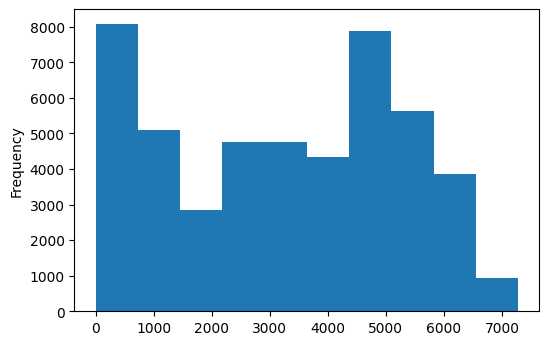

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()

i_94['traffic_volume'].describe()

## Traffic Volume: Day vs. Night

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
This isn't a perfect distinction.

In [5]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [6]:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & 
                  (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) |
                   (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


There is a difference between ```day``` and ```night```, due to a few hours of missing data.

We're going to compare the traffic volume for day and night by plotting the histograms of traffic_volume for both. We will organize both side-by-side on a grid chart.

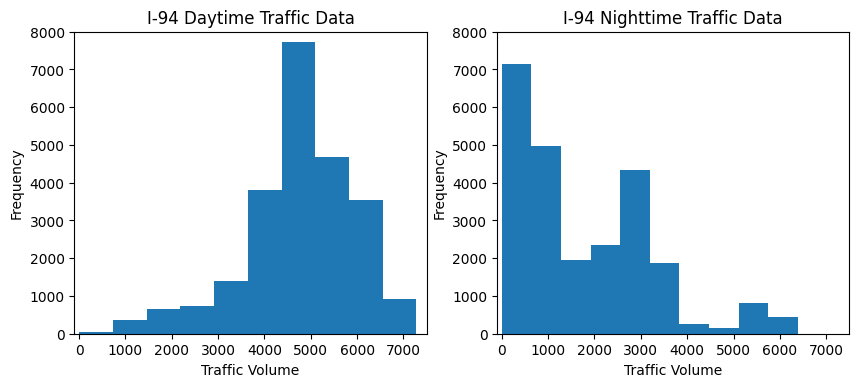

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('I-94 Daytime Traffic Data')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('I-94 Nighttime Traffic Data')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

## Time Indicators

We can see that traffic at night is generally light. Since our goals is to find indicators of heavy traffic, we will only focus our efforts on the daytime data gonig forward.

One possible indicator that can affect traffic is time. We will look at a few line plots showing how trafifc volume cahnges according to the following:
* Month
* Day of the week
* Time of day

The quickest way to get the avearge traffic volume for each month is by usigng the ```datafram.groupby()``` method. 

We will do the following:
* Use ```day['date_tiem'].dt.month``` to create a new column where each value describes the month when the traffic volume measurement was taken.
* Use ```day.groupby('month').mean()``` to group the dataset by the ```month``` column with the mean as an aggregate function.

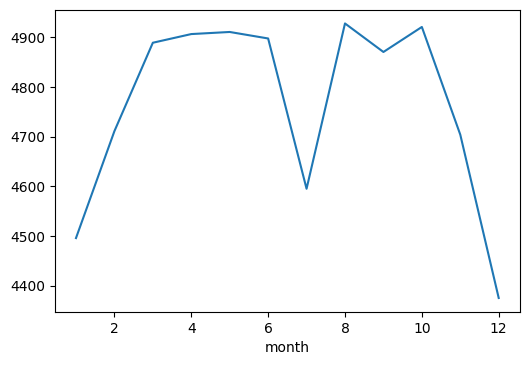

In [8]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

It's observed that traffic appears to be the lowest in July ("7", in the line plot).

We will now continue building line plots for the day of the week. To get the traffic volume averages for each day of the week, we will need to use the following code:

```day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday```

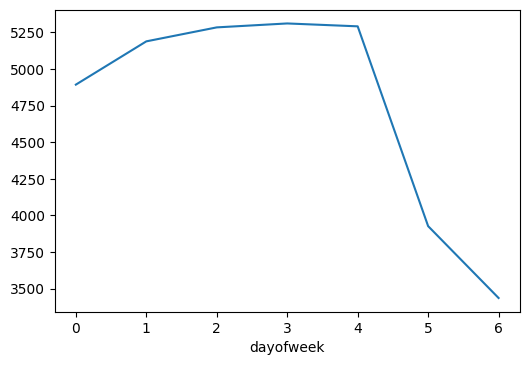

In [9]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()  # 0 is Monday, 6 is Sunday

plt.show()

On a weekly basis, it is clear that business days see more traffic when compared to the weekeed. The line plot appears to indicate that Wednesday (2), Thursday (3), and Friday (4) tend to see the highest traffic on this section of the I-94 Westbound.

We will now generate a line plot for the time of day. The data from the weekends will bring down the average so we will have to look at the averages separately. We will split the day based on the day type: business day or weekend.

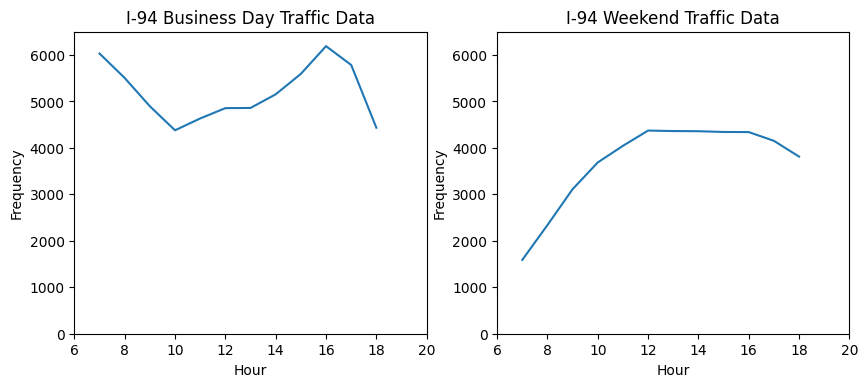

In [10]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylim(0, 6500)
plt.xlim(6, 20)
plt.title('I-94 Business Day Traffic Data')
plt.ylabel('Frequency')
plt.xlabel('Hour')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim(0, 6500)
plt.xlim(6, 20)
plt.title('I-94 Weekend Traffic Data')
plt.ylabel('Frequency')
plt.xlabel('Hour')

plt.show()

As initially thought, the averages for weekend traffic would be lower than business days.

For business days (Monday - Friday), rush hour traffic appears to coincide with 7:00 and 16:00. Based on our findings for heavy traffic thus far, the time indicators appear to be:

* Daytime hours
* Business days (Monday to Friday)
* The months of March - June, August, and October

---

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset itself does provide some columns about weather: ```temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description```.

First, we will find the correlation values between ```traffic_volume``` and the numerical weather columns: ```temp, rain_1h, snow_1h, clouds_all```.

In [11]:
day.corr()[['traffic_volume']]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
dayofweek,-0.416453
hour,0.172704


The weather column with the strongest correlation to ```traffic_volume``` is ```temp```. The other weather-realted columns do not show any kind of strong relation worthy enough of analysis.

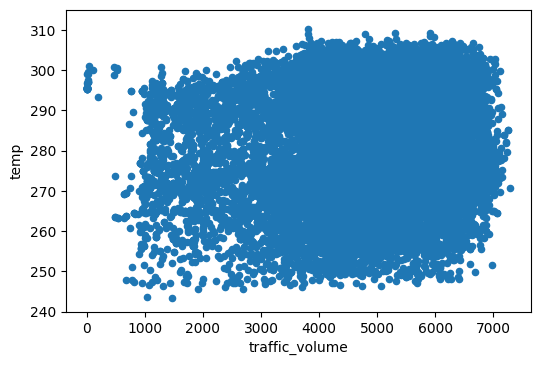

In [12]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(240,315)
plt.show()

We can conclude that temperature does prove to be a strong indicator of heavy traffic on the I-94 Westbound.

---

## Weather Types

We will next look at categorical weather-related columns: ```weather_main```, and ```weather_description```. We will calculate the average traffic volumne associated with each unique value in these columns.

The data will be grouped while using the mean as an aggregate function. Then we will plot a horizontal bar plot for both groups.

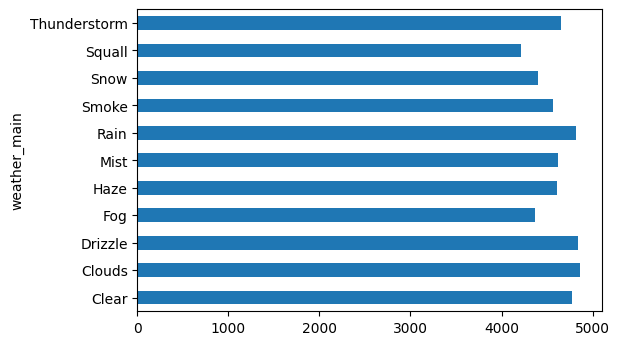

In [14]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Based on the plot above, no traffic volumne exceeds 5000 cars. The highest indicators generated from this visualization show ```rain```, ```drizzle```, and ```clouds``` as realtive indicators. We will not count these results as indicative of heavy traffic in this dataset.

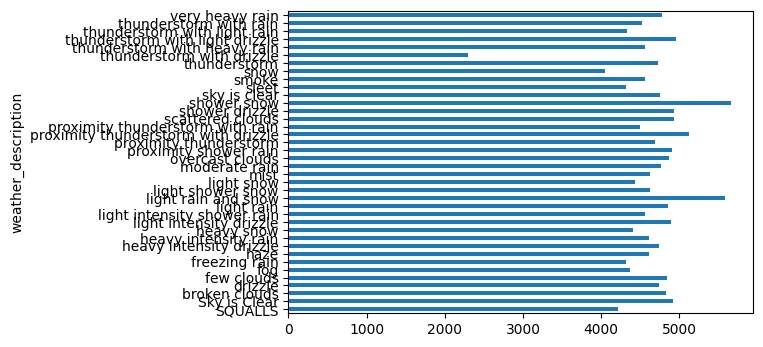

<Figure size 500x1000 with 0 Axes>

In [41]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh()
plt.figure(figsize=(5,10))
plt.show()

The plot above indicates ```light rain and snow``` and ```shower show``` to be indicators of heavy traffic, will volumes well exceeding 5000 cars.

---

We were able to determine some indicators for heavy traffic on the westbound I-94 between Minneapolis and Saint Paul based on time and weather. We found that heavy traffic was prevant during daytime hours between Monday to Friday, from the months between March and October. 

Weather-wise, it was determined that snow showera and a mix of light rain and snow also impact traffic along this route.